## Homework

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 

### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`


### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `industry`
- `location`
- `lead_source`
- `employment_status`


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74
- 0.84
- 0.94


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.


### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw03
* If your answer doesn't match options exactly, select the closest one

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
print('Types of features:')
print(df.dtypes)
print('--------------------------------')
print('Number of missing values in each feature:')
print(df.isnull().sum())

Types of features:
lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object
--------------------------------
Number of missing values in each feature:
lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


In [5]:
# Fill missing values in categorical features with 'NA'
cat_features = list(df.dtypes[df.dtypes == 'object'].index)

for c in cat_features:
    df[c] = df[c].fillna('NA')
    
# Fill missing values in numerical features with 0.0
num_features = list(df.dtypes[df.dtypes != 'object'].index)

for c in num_features:
    df[c] = df[c].fillna(0.0) 

In [6]:
print('After filling missing values:')
print(df.isnull().sum())

After filling missing values:
lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64


In [ ]:
# Question 1
# What is the most frequent observation (mode) for the column industry?

print(df['industry'].unique())
print('--------------------------------')
mode = df['industry'].mode()[0]
print(f'The most frequent observation (mode) for the column industry is: {mode}')
# The most frequent observation (mode) for the column industry is: retail
# 'retail'

['NA' 'retail' 'healthcare' 'education' 'manufacturing' 'technology'
 'other' 'finance']
--------------------------------
The most frequent observation (mode) for the column industry is: retail


In [ ]:
# Question 2
# Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

# What are the two features that have the biggest correlation?

# interaction_count and lead_score
# number_of_courses_viewed and lead_score
# number_of_courses_viewed and interaction_count
# annual_income and interaction_count <<<

# Only consider the pairs above when answering this question.

print(df['interaction_count'].corr(df['lead_score']))
print(df['number_of_courses_viewed'].corr(df['lead_score']))
print(df['number_of_courses_viewed'].corr(df['interaction_count']))
print(df['annual_income'].corr(df['interaction_count']))

# annual_income and interaction_count

0.0098881824969131
-0.004878998354681263
-0.023565222882888103
0.027036472404814327


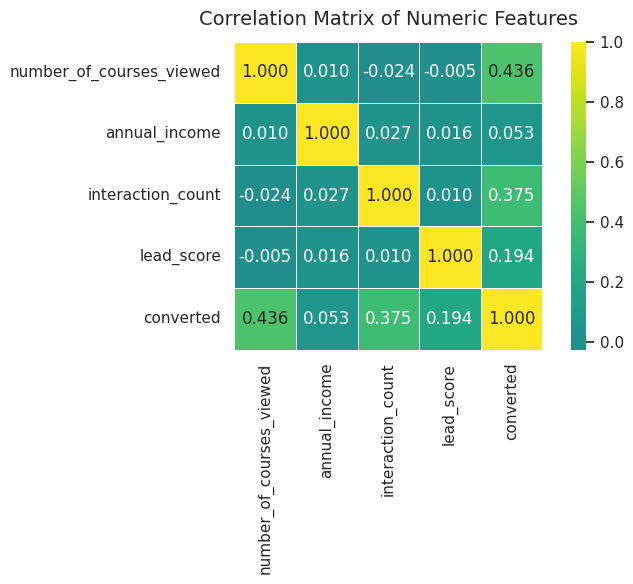

In [20]:
corr_matrix = df[num_features].corr()

# Set up the plot size and style
plt.figure(figsize=(8, 6))
sns.set(style="white")

# Plot the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,        # display correlation values
    fmt=".3f",         # format to 3 decimal places
    cmap='viridis', # "coolwarm",   # color palette
    center=0,          # center colormap at 0
    linewidths=0.5,    # thin lines between cells
    square=True        # make cells square-shaped
)

plt.title("Correlation Matrix of Numeric Features", fontsize=14, pad=12)
plt.tight_layout()
plt.show()


In [ ]:
# Split the data
# Split your data in train/val/test sets with 60%/20%/20% distribution.
# Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
# Make sure that the target value y is not in your dataframe.

X = df.drop('converted', axis=1)
y = df['converted']

# 60 / 20 / 20
X_full_train, X_test, y_full_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_full_train, y_full_train, test_size=0.25, random_state=42
)

print(len(X_train), len(X_val), len(X_test))
print(len(y_train) + len(y_val) + len(y_test))
print(df.shape)

# df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
# df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

876 293 293
1462
(1462, 9)


In [35]:
# Reset indexs
for d in [X_train, X_val, X_test]:
    d.reset_index(drop=True, inplace=True)


In [ ]:
# Question 3
# Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
# Round the scores to 2 decimals using round(score, 2).
# Which of these variables has the biggest mutual information score?

# industry
# location
# lead_source
# employment_status

from sklearn.preprocessing import LabelEncoder

X_train_encoded = X_train.copy()

cat_cols = X_train_encoded.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train[col])

mi = mutual_info_classif(X_train_encoded[cat_cols], y_train, discrete_features=True)
mi_series = pd.Series(mi, index=cat_cols).sort_values(ascending=False)
print(mi_series.round(3))

# lead_source          0.04 <<<
# employment_status    0.01
# industry             0.01
# location             0.00
# dtype: float64


lead_source          0.035
employment_status    0.013
industry             0.012
location             0.004
dtype: float64


In [67]:
# Question 4
# Now let's train a logistic regression.
# Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
# Fit the model on the training dataset.
# To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
# model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
# Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
# What accuracy did you get?

# 0.64
# 0.74 <<<
# 0.84
# 0.94

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical = X_train.select_dtypes(include=['object']).columns
numerical = X_train.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', 'passthrough', numerical)
])

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f'Validation accuracy:, {acc:.2f}')

# print(f'C={c}: Validation accuracy: {acc:.3f}')

# Validation accuracy: 0.70

Validation accuracy:, 0.70


In [68]:
# Question 5
# Let's find the least useful feature using the feature elimination technique.
# Train a model using the same features and parameters as in Q4 (without rounding).
# Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
# For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
# Which of following feature has the smallest difference?

# 'industry'
# 'employment_status'
# 'lead_score'
# Note: The difference doesn't have to be positive.

base_acc = accuracy_score(y_val, model.predict(X_val))
print('Base accuracy:', base_acc)

diffs = {}
for c in categorical:
    X_train_tmp = X_train.drop(columns=[c])
    X_val_tmp = X_val.drop(columns=[c])
    
    preproc_tmp = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), X_train_tmp.select_dtypes(include=['object']).columns),
        ('num', 'passthrough', numerical)
    ])
    
    m = Pipeline(steps=[
        ('preprocess', preproc_tmp),
        ('logreg', LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42))
    ])
    m.fit(X_train_tmp, y_train)
    acc_tmp = accuracy_score(y_val, m.predict(X_val_tmp))
    
    diffs[c] = base_acc - acc_tmp

pd.Series(diffs).sort_values()

# location            -0.010239
# lead_source         -0.003413
# industry             0.000000 <<<
# employment_status    0.003413
# dtype: float64

Base accuracy: 0.6996587030716723


location            -0.010239
lead_source         -0.003413
industry             0.000000
employment_status    0.003413
dtype: float64

In [69]:
# Question 6
# Now let's train a regularized logistic regression.
# Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
# Train models using all the features as in Q4.
# Calculate the accuracy on the validation dataset and round it to 3 decimal digits.
# Which of these C leads to the best accuracy on the validation set?

# 0.01
# 0.1
# 1
# 10
# 100
# Note: If there are multiple options, select the smallest C.

for c in [0.01, 0.1, 1, 10, 100]:
    model = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('logreg', LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42))
    ])
    model.fit(X_train, y_train)
    acc = accuracy_score(y_val, model.predict(X_val))
    print(f'C={c}: Validation accuracy: {acc:.3f}')

# C=0.01: Validation accuracy: 0.700 <<<
# C=0.1: Validation accuracy: 0.700
# C=1: Validation accuracy: 0.700
# C=10: Validation accuracy: 0.700
# C=100: Validation accuracy: 0.700

C=0.01: Validation accuracy: 0.700
C=0.1: Validation accuracy: 0.700
C=1: Validation accuracy: 0.700
C=10: Validation accuracy: 0.700
C=100: Validation accuracy: 0.700


In [ ]:
# End of the notebook